# ***Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech***

- **Nama:** Rendika Nurhartanto Suharto
- **Email:** rendikarendi96@gmail.com
- **ID Dicoding:** RENDIKA NURHARTANTO SUHARTO

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
# ---------------------------- # BASE
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import datetime as dt
import pickle
import time
import os
import random
import math

import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mcolors

# ---------------------------- # CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Display all columns in DataFrame and set float display format
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# ---------------------------- # MACHINE LEARNING AND PREPROCESSING LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

# ---------------------------- # MOUNT GOOGLE DRIVE (For Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Menyiapkan data yang akan diguankan

In [ ]:
# Folder path
mainPath = '/content/drive/MyDrive/Colab Notebooks/3. Semester 8/2. Laskar AI - Dicoding x Nvidia/Belajar Penerapan Data Science/Submission Akhir - Menyelesaikan Permasalahan Institusi Pendidikan'
dataPath = os.path.join(mainPath, 'dataset/')
modelPath = os.path.join(mainPath, 'model/')
dashboardPath = os.path.join(mainPath, 'dashboard/')

In [ ]:
df = pd.read_csv(dataPath + "data.csv", sep =";") # Load Data

In [ ]:
df.sample(3)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
3718,1,43,1,9147,1,1,122.00,1,1,38,1,7,118.90,0,0,0,1,1,0,21,0,0,5,11,2,10.50,0,0,5,13,0,0.00,0,12.70,3.70,-1.70,Dropout
4363,1,17,3,9853,1,1,133.10,1,34,34,0,0,115.00,0,0,0,1,0,0,18,0,0,6,10,2,10.50,0,0,6,13,0,0.00,0,7.60,2.60,0.32,Dropout
4248,2,39,1,9500,1,3,130.00,1,1,1,4,6,140.00,0,0,1,0,0,0,30,0,3,7,11,3,12.33,0,3,7,9,3,11.67,0,13.90,-0.30,0.79,Dropout


## Data Understanding

### *Explore Dataset Structure*
Mengecek ukuran dataset (jumlah baris dan kolom) dan tipe data setiap kolom.

In [ ]:
# Mengecek dimensi dataset dan tipe data
print("Kolom :", df.shape[1], "Baris :", df.shape[0])
display(df.dtypes)

Kolom : 37 Baris : 4424


,0
Marital_status,int64
Application_mode,int64
Application_order,int64
Course,int64
Daytime_evening_attendance,int64
Previous_qualification,int64
Previous_qualification_grade,float64
Nacionality,int64
Mothers_qualification,int64
Fathers_qualification,int64


### *Explore Descriptive Statistics*
Menghitung statistik dasar seperti mean, median, standar deviasi, min, max, dan quantiles untuk kolom numerik. Memahami distribusi data dalam kolom numerik, misalnya harga, jumlah produk, dll.

In [ ]:
# Menyajikan statistik deskriptif dasar untuk kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
descriptive_stats = df[numeric_columns].describe()

# Menampilkan statistik deskriptif
display(descriptive_stats)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,1.18,18.67,1.73,8856.64,0.89,4.58,132.61,1.87,19.56,22.28,10.96,11.03,126.98,0.55,0.01,0.11,0.88,0.35,0.25,23.27,0.02,0.71,6.27,8.30,4.71,10.64,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,0.00
std,0.61,17.48,1.31,2063.57,0.31,10.22,13.19,6.91,15.60,15.34,26.42,25.26,14.48,0.50,0.11,0.32,0.32,0.48,0.43,7.59,0.16,2.36,2.48,4.18,3.09,4.84,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27
min,1.00,1.00,0.00,33.00,0.00,1.00,95.00,1.00,1.00,1.00,0.00,0.00,95.00,0.00,0.00,0.00,0.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06
25%,1.00,1.00,1.00,9085.00,1.00,1.00,125.00,1.00,2.00,3.00,4.00,4.00,117.90,0.00,0.00,0.00,1.00,0.00,0.00,19.00,0.00,0.00,5.00,6.00,3.00,11.00,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70
50%,1.00,17.00,1.00,9238.00,1.00,1.00,133.10,1.00,19.00,19.00,5.00,7.00,126.10,1.00,0.00,0.00,1.00,0.00,0.00,20.00,0.00,0.00,6.00,8.00,5.00,12.29,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,0.32
75%,1.00,39.00,2.00,9556.00,1.00,1.00,140.00,1.00,37.00,37.00,9.00,9.00,134.80,1.00,0.00,0.00,1.00,1.00,0.00,25.00,0.00,0.00,7.00,10.00,6.00,13.40,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79
max,6.00,57.00,9.00,9991.00,1.00,43.00,190.00,109.00,44.00,44.00,194.00,195.00,190.00,1.00,1.00,1.00,1.00,1.00,1.00,70.00,1.00,20.00,26.00,45.00,26.00,18.88,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51


### *Heatmap Correlation Based on "Status"*

In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Kolom yang ingin di-encode, misalnya 'Status'
df['Status_enc'] = label_encoder.fit_transform(df['Status'])

In [ ]:
# Menghitung korelasi untuk kolom 'special_col' dengan kolom lainnya (kecuali kolom target 'special_col' itu sendiri)
correlation_with_only_status = (df.drop(columns=["Status"]).corr()['Status_enc'][:-1]).to_frame()  # Menghapus 'Status_enc' dari hasil

In [ ]:
# Menyaring korelasi yang lebih besar dari 0.15 atau lebih kecil dari -0.15
filtered_correlation = correlation_with_only_status[(
    correlation_with_only_status['Status_enc'] > 0.15) |
 (correlation_with_only_status['Status_enc'] < -0.15)]

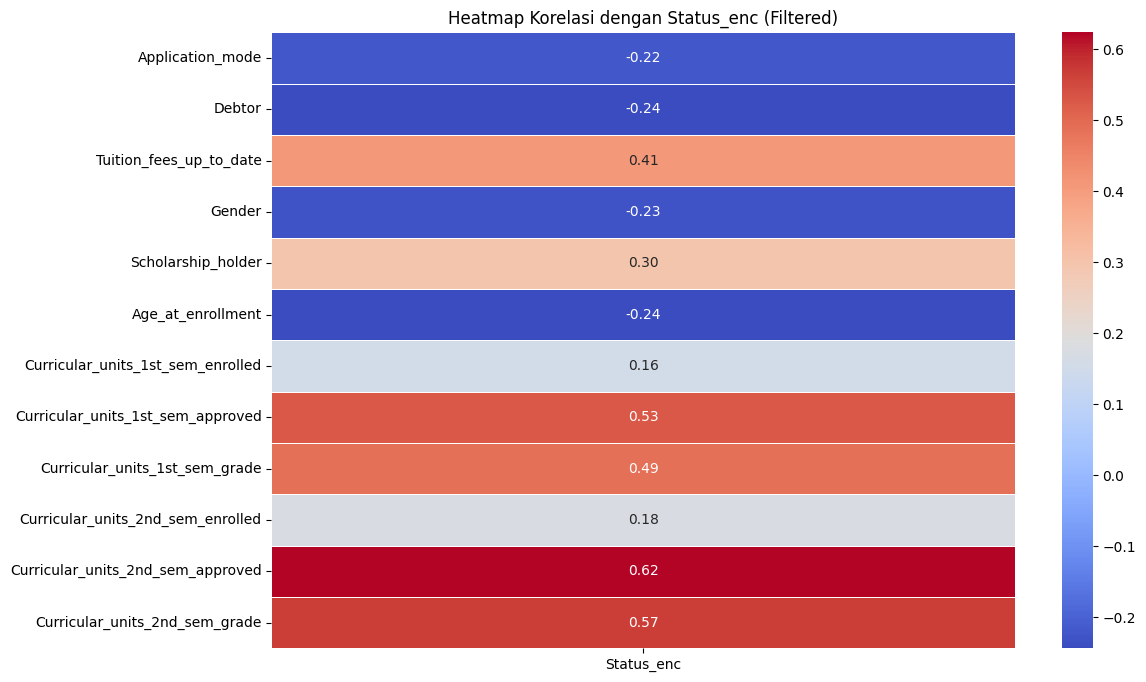

In [ ]:
# Menampilkan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi dengan Status_enc (Filtered)")
plt.show()

### *Assessing Data*

In [ ]:
def check_duplicates(dataframe, kolom=None): # Function untuk memeriksa data duplikat pada dataframe
    """
    Memeriksa nilai duplikat dari DataFrame.
    Menampilkan jumlah duplikat dan 10 nilai duplikat teratas (jika ada).
    Args:
        dataframe (pd.DataFrame): DataFrame yang akan diperiksa.
        kolom (list, optional): Kolom-kolom spesifik yang ingin diperiksa. Jika None, diperiksa semua kolom.
    """
    # Menampilkan nilai duplikat
    print("Nilai Duplikat (10 Teratas):")
    duplicate_values = dataframe[dataframe.duplicated(subset=kolom, keep='first')]
    duplicate_count = duplicate_values.shape[0]
    print(f"Jumlah Duplikat data: {duplicate_count}")
    if duplicate_count > 0:
        display(duplicate_values.head(10))
    else:
        print("Tidak ada duplikat yang ditemukan.")
    print("-" * 30)

def missing_data(data): # function untuk menampilkan missing value pada dataframe dalam bentuk jumlah dan presentase
    """
    Memeriksa nilai yang hilang di DataFrame.
    Args:
        data (pd.DataFrame): DataFrame yang akan diperiksa.
    Returns:
        pd.DataFrame: DataFrame berisi total dan persentase nilai yang hilang.
    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False).round(3)
    missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    print(f"\nTotal Kolom dengan Missing Values: {(total > 0).sum()}")
    print("-" * 30)

    return missing_df

In [ ]:
check_duplicates(df) # Cek Duplikasi Data pada dataframe yang di combine

Nilai Duplikat (10 Teratas):
Jumlah Duplikat data: 0
Tidak ada duplikat yang ditemukan.
------------------------------


In [ ]:
missing_percentage = missing_data(df) # Calculate missing value percentages
missing_percentage


Total Kolom dengan Missing Values: 0
------------------------------


,Total,Percent
Marital_status,0,0.00
Curricular_units_2nd_sem_enrolled,0,0.00
Curricular_units_1st_sem_credited,0,0.00
Curricular_units_1st_sem_enrolled,0,0.00
Curricular_units_1st_sem_evaluations,0,0.00
Curricular_units_1st_sem_approved,0,0.00
Curricular_units_1st_sem_grade,0,0.00
Curricular_units_1st_sem_without_evaluations,0,0.00
Curricular_units_2nd_sem_credited,0,0.00
Curricular_units_2nd_sem_evaluations,0,0.00


In [ ]:
def detect_outliers_iqr(df): #function for detect outlier
    """
    Menemukan outlier dengan metode IQR untuk setiap kolom numerik.
    Args:
        df (pd.DataFrame): DataFrame yang akan diperiksa.
    Returns:
        pd.DataFrame: DataFrame dengan status outlier untuk setiap kolom numerik.
    """
    # Menyimpan informasi outlier untuk setiap kolom
    outlier_info = {}

    # Menentukan kolom numerik yang akan diperiksa
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    for col in numeric_columns:
        # Menghitung Q1, Q3, dan IQR untuk kolom
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan lower dan upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menandai outliers
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_info[col] = outliers.sum()  # Jumlah outliers di setiap kolom

    # Menampilkan jumlah outliers per kolom
    outlier_df = pd.DataFrame.from_dict(outlier_info, orient='index', columns=['Outlier Count'])
    outlier_df['Outlier Percentage'] = (outlier_df['Outlier Count'] / len(df)) * 100
    return outlier_df

# Function to plot boxplot for columns with outliers
def plot_boxplots_for_outliers(df):
    """
    Menampilkan boxplot untuk setiap kolom yang memiliki outlier berdasarkan IQR.
    Args:
        df (pd.DataFrame): DataFrame yang akan diperiksa dan divisualisasikan.
    """
    # Menentukan kolom numerik
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Menyaring kolom yang memiliki outliers berdasarkan IQR
    outliers = detect_outliers_iqr(df)
    outlier_columns = outliers[outliers['Outlier Count'] > 0].index.tolist()

    if not outlier_columns:
        print("Tidak ada kolom dengan outliers.")
        return

    # Menyiapkan subplot
    num_plots = len(outlier_columns)
    fig, axes = plt.subplots(nrows=(num_plots // 3) + (num_plots % 3 > 0), ncols=3, figsize=(15, 11))
    axes = axes.flatten()

    for i, col in enumerate(outlier_columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot for {col}')

    # Menyesuaikan layout agar tidak saling tumpang tindih
    plt.tight_layout()
    plt.show()

In [ ]:
# Tampilkan hasil deteksi outliers menggunakan IQR
display(detect_outliers_iqr(df))

,Outlier Count,Outlier Percentage
Marital_status,505,11.42
Application_mode,0,0.00
Application_order,541,12.23
Course,442,9.99
Daytime_evening_attendance,483,10.92
Previous_qualification,707,15.98
Previous_qualification_grade,179,4.05
Nacionality,110,2.49
Mothers_qualification,0,0.00
Fathers_qualification,0,0.00


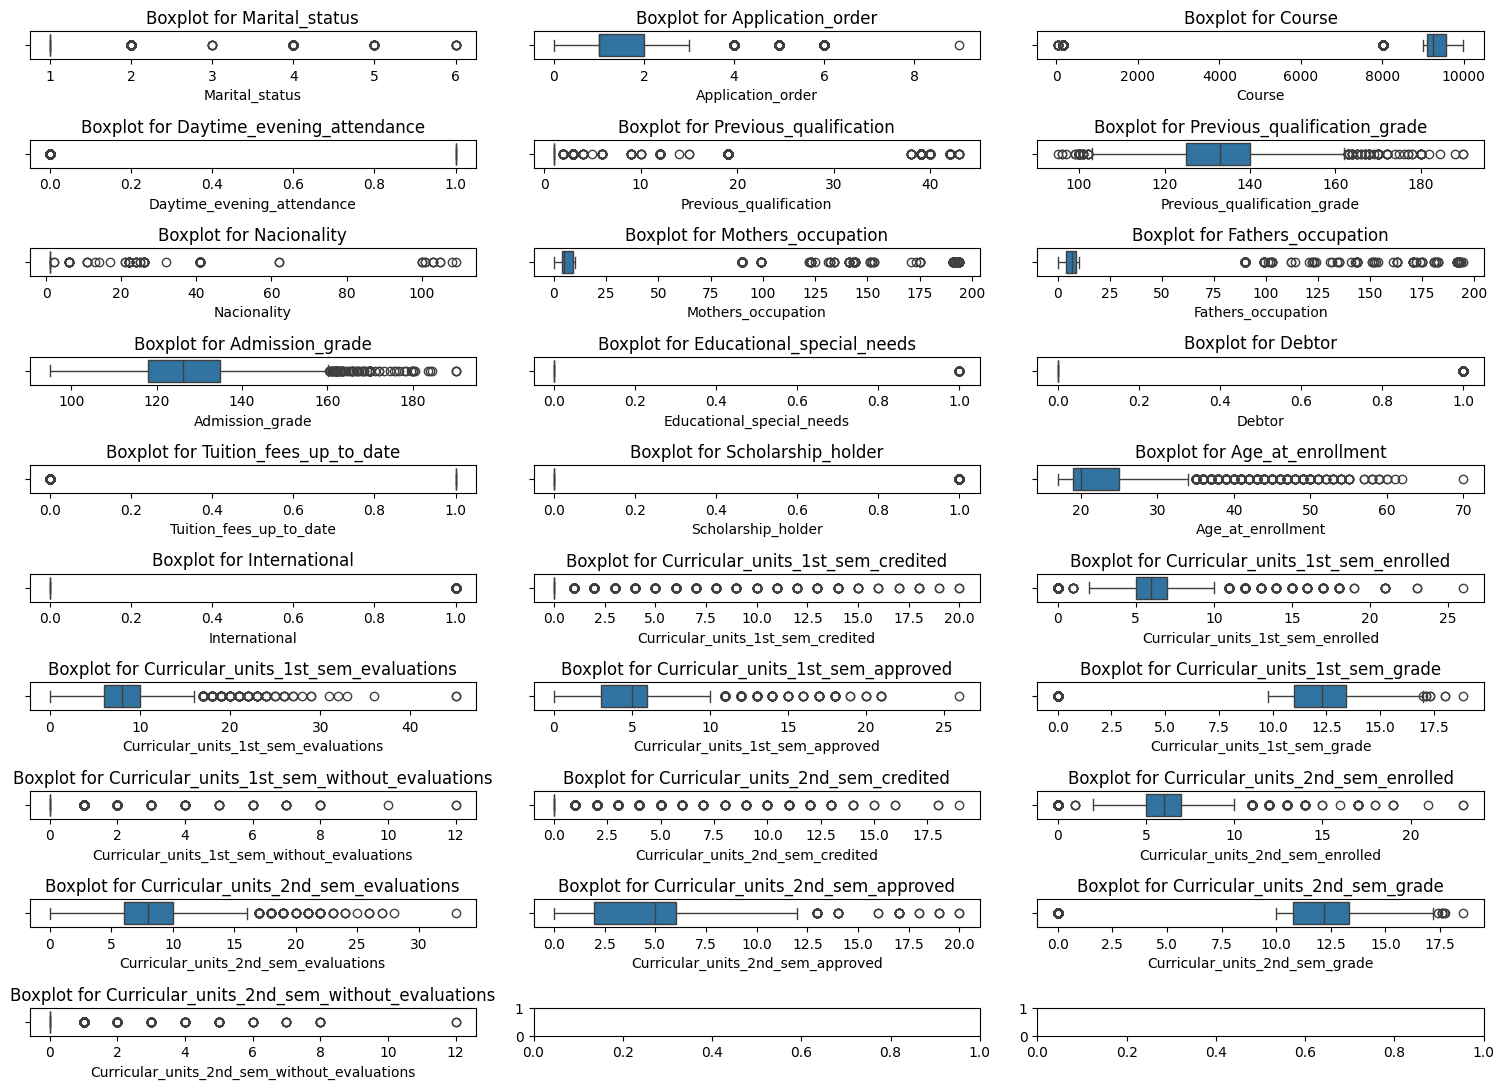

In [ ]:
# Plot boxplots untuk kolom dengan outliers
plot_boxplots_for_outliers(df)

## Data Preparation / Preprocessing

### Make A dataset for Dashboard

In [ ]:
df_dashboard = df.copy() # Copy dataframe untuk di buatkan makna dari masing-masing encode label, sehingga lebih informatif saat di dashboarding-nya

In [ ]:
mappings_categorical = {
    "Application_mode": {
        17: '2nd_phase_GC',
        15: 'Intl_student_bachelor',
        1: '1st_Ph_GC',
        39: '>23y.o',
        18: '3rd_Ph_GC',
        53: 'short_Cyc_diploma',
        44: 'tech_Spc_diploma',
        51: 'change_of_Inst/Crs',
        43: 'change_of_Crs',
        7: 'holders_of_other_higher_Crs',
        42: 'transfer',
        16: '1st_Ph_SC_Madeira_Island',
        5: '1st_Ph_SC_Azores_Island',
        2: 'ordinance_no_612/93',
        10: 'ordinance_no_854-B/99',
        57: 'change_of_Inst/Crs_Intl',
        26: 'ordinance_no_533_A/99_item_b2_DP',
        27: 'ordinance_no_533_A/99_item_b3_OI'
},
    "Course": {
        171: 'Animation_Multimed_Des',
        9254: 'Tourism',
        9070: 'Communic_Des',
        9773: 'Journalism_Communic',
        8014: 'Social_Serv_eve_AA',
        9500: 'Nursing',
        9238: 'Social_Serv',
        9670: 'Adver_Mktg_Mgmt',
        9853: 'Basic_Edu',
        9085: 'Veterinary_Nursing',
        9130: 'Equinculture',
        9556: 'Oral_Hygiene',
        9147: 'Mgmt',
        9003: 'Agronomy',
        33: 'Biofuel_Prod_Techno',
        9119: 'Informatics_Engin',
        9991: 'Mgmt_evening_eve_AA'
},
    "Previous_qualification": {
        1: '2nd_Edu',
        19: 'Basic_Edu_3rd_Cyc_or_Eq',
        42: 'Pro_higher_Technic_Crs',
        39: 'Techno_Spc_Crs',
        10: '11th_yr_of_Sch_NC',
        3: 'degree',
        40: 'degree_1st_cyc',
        2: 'bachelors_degree',
        4: 'masters',
        12: 'Other/11th_yr_of_Sch',
        43: 'master_2nd_cycle',
        15: '10th_yr_of_Sch_NC',
        6: 'Freq_of_higher_Edu',
        9: '12th_yr_of_Sch_NC',
        38: 'Basic_edu_2nd_Cyc_or_Eq',
        5: 'doctorate'
},
    "Nacionality" : {
        1: 'Portuguese',
        62: 'Romanian',
        41: 'Brazilian',
        26: 'Santomean',
        103: 'Ukrainian',
        13: 'Dutch',
        25: 'Mozambican',
        21: 'Angolan',
        101: 'Mexican',
        11: 'Italian',
        22: 'Cape Verdean',
        32: 'Turkish',
        100: 'Moldova (Republic of)',
        24: 'Guinean',
        109: 'Colombian',
        2: 'German',
        108: 'Cuban',
        105: 'Russian',
        14: 'English',
        17: 'Lithuanian',
        6: 'Spanish'
},
    "Mothers_qualification" : {
        19: 'Basic_Edu_3rd_Cyc_or_Eq',
        1: '2nd_Edu_12th_yr_of_Sch_or_Eq',
        37: 'Basic_Edu_1st_Cyc_or_Eq',
        38: 'Basic_Edu_2nd_Cyc_or_Eq',
        3: 'Degree',
        4: 'Masters',
        42: 'Pro_higher_technic_Crs',
        2: 'Bachelors_Degree',
        34: 'Unknown',
        12: 'Other_11th_yr_of_Sch',
        40: 'degree_1st_Cyc',
        9: '12th_Year_of_Sch_NC',
        5: 'Doctorate',
        39: 'Techno_Spc_Crs',
        11: '7th_Year_Old',
        41: 'Spc_higher_studies_Crs',
        30: '8th_yr_of_Sch',
        14: '10th_yr_of_Sch',
        35: 'Cannot_read_or_write',
        36: 'Can_read_W/o_having_4th_yr_of_Sch',
        6: 'Freq_of_Higher_Edu',
        10: '11th_yr_of_Sch_NC',
        29: '9th_yr_of_Sch_NC',
        43: 'Master_2nd_Cyc',
        18: 'General_commerce_Crs',
        22: 'Technic_Pro_Crs',
        27: '2nd_cyc_of_the_general_high_Sch_Crs',
        26: '7th_yr_of_Sch',
        44: 'Doctorate_3rd_Cyc'
},
    "Fathers_qualification" : {
        12: 'Other_11th_yr_of_Sch',
        3: 'Degree',
        37: 'Basic_Edu_1st_Cyc_or_Eq',
        38: 'Basic_Edu_2nd_Cyc_or_Eq',
        1: '2nd_Edu_12th_yr_of_Sch_or_Eq',
        19: 'Basic_Edu_3rd_cyc_or_Eq',
        5: 'Doctorate',
        4: 'Masters',
        34: 'Unknown',
        2: 'Bachelors_Degree',
        39: 'Techno_Spc_Crs',
        11: '7th_yr_Old',
        9: '12th_yr_of_Sch_NC',
        36: 'Can_read_W/o_having_4th_yr_of_Sch',
        26: '7th_yr_of_Sch',
        40: 'degree_1st_Cyc',
        14: '10th_yr_of_Sch',
        20: 'Complementary_High_Sch_Course',
        35: 'Cannot_read_or_write',
        41: 'Spc_higher_studies_Crs',
        22: 'Technic_Pro_Crs',
        13: '2nd_yr_complementary_high_Sch_Crs',
        29: '9th_yr_of_Sch_NC',
        43: 'Master_2nd_Cyc',
        18: 'General_commerce_course',
        42: 'Pro_higher_technic_Crs',
        10: '11th_yr_of_Sch_NC',
        6: 'Freq_of_Higher_Edu',
        30: '8th_yr_of_Sch',
        25: 'Complementary_High_Sch_Crs_not_concluded',
        44: 'Doctorate_3rd_cyc',
        37: 'Basic_Edu_1st_Cyc_or_Eq',
        27: '2nd_Cyc_of_the_general_high_Sch_Crs',
        31: 'General_Crs_of_Admin_Commerce'
},
    "Mothers_occupation": {
        0: 'Student',
        1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: 'Blank',
        122: 'Health professionals',
        123: 'Teachers',
        125: 'Specialists in information and communication technologies (ICT)',
        131: 'Intermediate level science and engineering technicians and professions',
        132: 'Technicians and professionals, of intermediate level of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        141: 'Office workers, secretaries in general and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'Personal service workers',
        152: 'Sellers',
        153: 'Personal care workers and the like',
        171: 'Skilled construction workers and the like, except electricians',
        173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
        175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
        191: 'Cleaning workers',
        192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
        193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
        194: 'Meal preparation assistants'
},
    "Fathers_occupation": {
        0: 'Student',
        1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
        2: 'Specialists in Intellectual and Scientific Activities',
        3: 'Intermediate Level Technicians and Professions',
        4: 'Administrative staff',
        5: 'Personal Services, Security and Safety Workers and Sellers',
        6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
        7: 'Skilled Workers in Industry, Construction and Craftsmen',
        8: 'Installation and Machine Operators and Assembly Workers',
        9: 'Unskilled Workers',
        10: 'Armed Forces Professions',
        90: 'Other Situation',
        99: 'Blank',
        101: 'Armed Forces Officers',
        102: 'Armed Forces Sergeants',
        103: 'Other Armed Forces personnel',
        112: 'Directors of administrative and commercial services',
        114: 'Hotel, catering, trade and other services directors',
        121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
        122: 'Health professionals',
        123: 'Teachers',
        124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
        131: 'Intermediate level science and engineering technicians and professions',
        132: 'Technicians and professionals, of intermediate level of health',
        134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
        135: 'Information and communication technology technicians',
        141: 'Office workers, secretaries in general and data processing operators',
        143: 'Data, accounting, statistical, financial services and registry-related operators',
        144: 'Other administrative support staff',
        151: 'Personal service workers',
        152: 'Sellers',
        153: 'Personal care workers and the like',
        154: 'Protection and security services personnel',
        161: 'Market-oriented farmers and skilled agricultural and animal production workers',
        163: 'Farmers, livestock keepers, horticulturists, and similar'
},
    "Marital_status": {
        1: 'Single',
        2: 'Married',
        3: 'Widower',
        4: 'Divorced',
        5: 'Facto Union',
        6: 'legally separated'
},
    "Daytime_evening_attendance": {
        0: 'evening',
        1: 'daytime'
},
    "Gender": {
        0: 'Female',
        1: 'Male'
}
    }

In [ ]:
# Tentukan path untuk menyimpan file path untuk mapping nya, sapa tau dipake lagi nanti
mapping_file_path = modelPath +'/mappings_categorical.pkl'

# Menyimpan dictionary ke dalam file
joblib.dump(mappings_categorical, mapping_file_path)

print(f"Mappings saved to {mapping_file_path}")

Mappings saved to /content/drive/MyDrive/Colab Notebooks/3. Semester 8/2. Laskar AI - Dicoding x Nvidia/Belajar Penerapan Data Science/Submission Akhir - Menyelesaikan Permasalahan Institusi Pendidikan/model//mappings_categorical.pkl


In [ ]:
def fungsi_konversi_fitur(dashboard_data, mappings, feature_to_transform):
    # Loop untuk setiap kolom yang ada di mappings
    for column, mapping in mappings.items():
        if column in dashboard_data.columns:
            dashboard_data[column] = dashboard_data[column].replace(mapping)
    # Loop for yes and no feature
    for fitur in feature_to_transform:
      df_dashboard[fitur] = df_dashboard[fitur].apply(lambda x: "No" if x == 0 else "Yes")

    return dashboard_data

In [ ]:
feature_to_transform = ["Displaced", "Educational_special_needs", "Debtor", "Tuition_fees_up_to_date", "Scholarship_holder", "International"]

# Example of how to call the function
df_dashboard = fungsi_konversi_fitur(df_dashboard, mappings_categorical, feature_to_transform)

In [ ]:
df_dashboard.to_csv(dashboardPath + "data_dashboard_looker_studio.csv", index=False)

### **Feature Selection for Modeling**

In [ ]:
feature_to_use = filtered_correlation.index.tolist() + ["Status"] # Using feature that have more correlation with the target columns

In [ ]:
df_ML = df[feature_to_use] # Slicig Feature

### **Randomly sample 30 rows for inference model**

In [ ]:
# Memisahkan data berdasarkan label 'Status' (Dropout, Graduate, Enroll)
graduate_data = df_ML[df_ML['Status'] == 'Graduate']
dropout_data = df_ML[df_ML['Status'] == 'Dropout']
enrolled_data = df_ML[df_ML['Status'] == 'Enrolled']

# Sampling 10 data acak untuk masing-masing label
dropout_sample = dropout_data.sample(n=10, random_state=70)
graduate_sample = graduate_data.sample(n=10, random_state=70)
enroll_sample = enrolled_data.sample(n=10, random_state=70)

# Menggabungkan ketiga sample untuk inference
df_inference = pd.concat([dropout_sample, graduate_sample, enroll_sample])

In [ ]:
df_inference.head()

,Application_mode,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
1862,1,0,0,1,0,20,6,2,10.50,6,0,0.00,Dropout
4194,1,1,0,0,0,22,5,2,11.50,5,0,0.00,Dropout
2437,1,0,1,1,1,22,5,3,12.33,6,3,12.50,Dropout
1392,1,1,1,0,0,20,0,0,0.00,0,0,0.00,Dropout
219,17,0,1,0,0,21,5,0,0.00,5,2,13.50,Dropout


In [ ]:
df_inference.to_csv(dataPath + "data_inference.csv", index=False)

In [ ]:
# Menghapus data inference dari dataset utama
df_ML = df_ML.drop(df_inference.index).reset_index(drop=True)

In [ ]:
df_ML["Status"].value_counts()

,count
Status,
Graduate,2199
Dropout,1411
Enrolled,784


### **Feature Scaling with Min-Max Method**

In [ ]:
# Memilih kolom numerik saja untuk normalisasi
numerical_cols = df_ML.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
# Menyiapkan scaler
scaler = MinMaxScaler()

In [ ]:
# Menormalisasi kolom numerik
df_ML[numerical_cols] = scaler.fit_transform(df_ML[numerical_cols])

In [ ]:
# Menyimpan scaler ke file pickle
with open(modelPath + 'minmax_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### Splitting Data for Modeling

In [ ]:
# Memisahkan label 'Status' untuk stratified sampling
X = df_ML.drop(columns=['Status'])
y = df_ML['Status']

# Membagi data menjadi Train (85%) dan Test (15%) dengan stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Memastikan pembagian data
print(f"Train Set: {X_train.shape}, {y_train.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")

Train Set: (3734, 12), (3734,)
Test Set: (660, 12), (660,)


In [ ]:
# Menghitung distribusi label di Train, Test, dan Validation set
train_label_counts = y_train.value_counts()
test_label_counts = y_test.value_counts()

# Menampilkan distribusi label
print("Train Set Label Distribution:")
print(train_label_counts)
print("\nTest Set Label Distribution:")
print(test_label_counts)

Train Set Label Distribution:
Status
Graduate    1869
Dropout     1199
Enrolled     666
Name: count, dtype: int64

Test Set Label Distribution:
Status
Graduate    330
Dropout     212
Enrolled    118
Name: count, dtype: int64


## Modeling

Menggunakan 3 algoritma model, yaitu Gradient Boosting, Random Forest dan LightGBM. Bertujuan untuk membuat sebuah model prediksi yang baik dalam mengetahui status siswa. Digunakan juga sebuah metode tuning parameter model yaitu random search agar dapat mengoptimalkan hasil evaluasi model.

#### Set-up Parameter for Tuning Model

In [ ]:
# Parameter untuk tiap model
param_grid_gb = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [31, 50, 70],
    'max_depth': [5, 10, 15],
    'subsample': [0.8, 0.9, 1.0]
}

# Model yang akan digunakan
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "LightGBM": LGBMClassifier(),
}

#### Do Training & Hyperparameter Tuning for Each Model

In [ ]:
# Dictionary untuk menyimpan model terbaik
best_models = {}

# Menggunakan RandomizedSearchCV untuk tiap model
for model_name, model in models.items():
    print(f"Starting {model_name}...")

    # Pilih parameter grid sesuai dengan model
    if model_name == "Gradient Boosting":
        search = RandomizedSearchCV(model, param_grid_gb, n_iter=100, cv=5, verbose=1, random_state=70, n_jobs=-1)
    elif model_name == "Random Forest":
        search = RandomizedSearchCV(model, param_grid_rf, n_iter=100, cv=5, verbose=1, random_state=70, n_jobs=-1)
    elif model_name == "LightGBM":
        search = RandomizedSearchCV(model, param_grid_lgbm, n_iter=100, cv=5, verbose=1, random_state=70, n_jobs=-1)

    # Melatih model menggunakan RandomizedSearchCV
    search.fit(X_train, y_train)

    # Menyimpan model terbaik
    best_models[model_name] = search.best_estimator_

    # Menampilkan parameter terbaik yang ditemukan
    print(f"Best Parameters for {model_name}: {search.best_params_} \n")

Starting Gradient Boosting...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Gradient Boosting: {'subsample': 0.9, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1} 

Starting Random Forest...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20} 

Starting LightGBM...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 3734, number of used features: 12
[LightGBM] [Info] Start training from score -1.135992
[LightGBM] [Info] Start training from score -1.723946
[LightGBM]

## Evaluation

### Accuracy, Precision, Recall, F1-Score, Heatmap(Confusion Matrix)

In [ ]:
# Fungsi untuk menghitung evaluasi model
def evaluate_model(model, X_test, y_test):
    # Prediksi pada test set
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Menampilkan hasil evaluasi
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Menghitung dan menampilkan confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=['Graduate', 'Dropout'])
    print("Confusion Matrix:")
    print(cm)

    # Plot Confusion Matrix sebagai heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

----------------------------------- Gradient Boosting -----------------------------------
Model Gradient Boosting disimpan di /content/drive/MyDrive/Colab Notebooks/3. Semester 8/2. Laskar AI - Dicoding x Nvidia/Belajar Penerapan Data Science/Submission Akhir - Menyelesaikan Permasalahan Institusi Pendidikan/model/Gradient_Boosting.pkl
Accuracy: 0.7621
Precision: 0.7471
Recall: 0.7621
F1 Score: 0.7502
Confusion Matrix:
[[301  10]
 [ 29 160]]


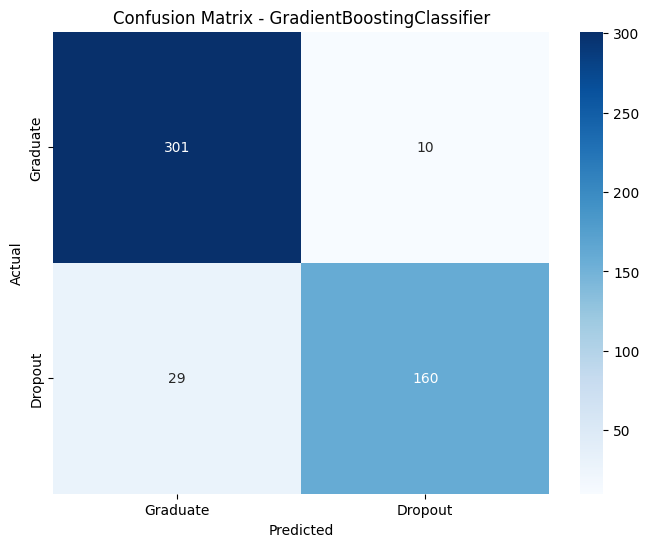

----------------------------------- Gradient Boosting -----------------------------------


----------------------------------- Random Forest -----------------------------------
Model Random Forest disimpan di /content/drive/MyDrive/Colab Notebooks/3. Semester 8/2. Laskar AI - Dicoding x Nvidia/Belajar Penerapan Data Science/Submission Akhir - Menyelesaikan Permasalahan Institusi Pendidikan/model/Random_Forest.pkl
Accuracy: 0.7606
Precision: 0.7423
Recall: 0.7606
F1 Score: 0.7437
Confusion Matrix:
[[303  11]
 [ 33 162]]


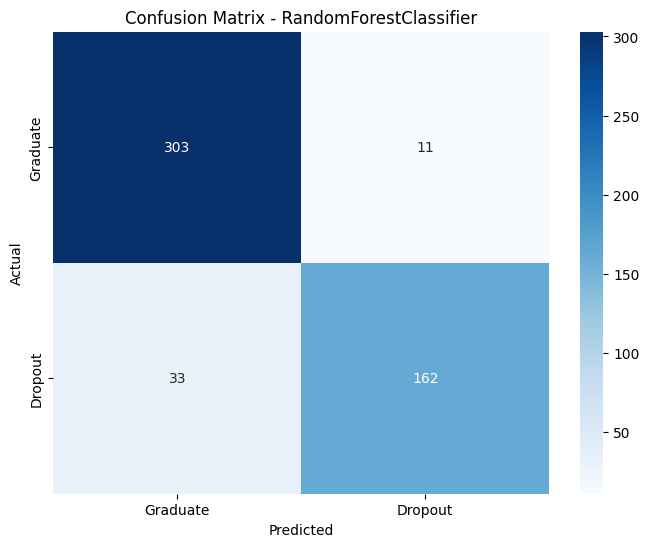

----------------------------------- Random Forest -----------------------------------


----------------------------------- LightGBM -----------------------------------
Model LightGBM disimpan di /content/drive/MyDrive/Colab Notebooks/3. Semester 8/2. Laskar AI - Dicoding x Nvidia/Belajar Penerapan Data Science/Submission Akhir - Menyelesaikan Permasalahan Institusi Pendidikan/model/LightGBM.pkl
Accuracy: 0.7621
Precision: 0.7434
Recall: 0.7621
F1 Score: 0.7463
Confusion Matrix:
[[306   8]
 [ 32 159]]


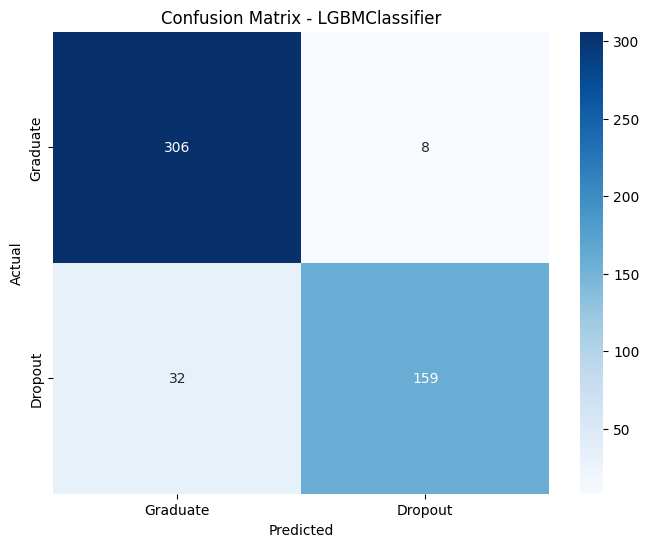

----------------------------------- LightGBM -----------------------------------




In [ ]:
for model_name, model in best_models.items():

    # Menyimpan model ke file .pkl menggunakan joblib
    model_file_path = os.path.join(modelPath, f"{model_name.replace(' ', '_')}.pkl")
    joblib.dump(model, model_file_path)

    print(f"{'-'*35} {model_name} {'-'*35}")
    print(f"Model {model_name} disimpan di {model_file_path}")
    # Evaluasi model terbaik menggunakan fungsi evaluate_model
    evaluate_model(model, X_test, y_test)
    print(f"{'-'*35} {model_name} {'-'*35}")

    print("\n")

## Inference Model

Menggunakan data random sample 30 rows yang sudah di ambil diawal, lalu digunakan sebagai unseen data yang dimana model belum pernah melihat nya.

In [ ]:
# ----------------- Load Scaler -----------------
# Menentukan path untuk MinMaxScaler
scaler_file_path = os.path.join(modelPath, 'minmax_scaler.pkl')

# Memuat MinMaxScaler yang sudah disimpan
scaler = joblib.load(scaler_file_path)

In [ ]:
# ----------------- Inference Model -----------------
truth_label = df_inference['Status']
inference_data_without_label = df_inference.drop(columns=['Status'], errors='ignore')

# Skalakan data inferensi menggunakan scaler yang sudah dimuat
inference_data_scaled = scaler.transform(inference_data_without_label)

In [ ]:
# Menyimpan hasil prediksi untuk setiap model
predictions = {}

# Mengambil daftar file model yang disimpan
model_files = [f for f in os.listdir(modelPath) if f.endswith('.pkl')]

# Menghapus scaler dari daftar model files
model_files.remove('minmax_scaler.pkl')
model_files.remove('mappings_categorical.pkl')

In [ ]:
# Iterasi untuk setiap model file yang ada di modelPath
for model_file in model_files:
    # Menentukan path model yang sudah disimpan
    model_file_path = os.path.join(modelPath, model_file)

    # Muat model yang sudah disimpan menggunakan joblib
    loaded_model = joblib.load(model_file_path)

    # Menentukan nama model berdasarkan nama file (menghilangkan ekstensi .pkl)
    model_name = os.path.splitext(model_file)[0]

    # Melakukan prediksi menggunakan model yang telah dimuat
    model_predictions = loaded_model.predict(inference_data_scaled)

    # Menambahkan hasil prediksi ke dalam dictionary
    predictions[model_name] = model_predictions

    # Menambahkan kolom prediksi ke dalam inference_data untuk masing-masing model
    df_inference[f'Predicted_Status_{model_name}'] = model_predictions

# Menambahkan kolom truth label ke dalam df_inference
df_inference["Status_Ground_Truth"] = truth_label

In [ ]:
# Menyimpan hasil akurasi untuk setiap model dalam variabel
accuracy_scores_inference = {}

# Menghitung dan menyimpan akurasi untuk setiap model
accuracy_scores_inference['Gradient_Boosting'] = accuracy_score(df_inference["Status_Ground_Truth"], df_inference["Predicted_Status_Gradient_Boosting"])
accuracy_scores_inference['LightGBM'] = accuracy_score(df_inference["Status_Ground_Truth"], df_inference["Predicted_Status_LightGBM"])
accuracy_scores_inference['Random_Forest'] = accuracy_score(df_inference["Status_Ground_Truth"], df_inference["Predicted_Status_Random_Forest"])

# Mencetak hasil akurasi
for model_name, accuracy in accuracy_scores_inference.items():
    print(f"Akurasi {model_name}: {accuracy:.4f}")

Akurasi Gradient_Boosting: 0.7000
Akurasi LightGBM: 0.6667
Akurasi Random_Forest: 0.6667


# Make requirements.txt

In [ ]:
# !pip freeze > requirements.txt